# Pandas - Time Series

- THE DICTIONARY DEFINES TIME SERIES ANALYSIS AS a specific way of analyzing a sequence of data points collected over an interval of time.
- Pandas was developed specifically for this, so let's learn some methods.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- Here we are going to do some leet bitcoin analysis.
- To start, go to yahoo finance and download as much data as you can from BTC-EUR.

In [24]:
bitcoin = pd.read_csv('BTC-EUR.csv')

In [54]:
print(bitcoin.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  359.546204  361.468506  351.586884  355.957367  355.957367   
2014-09-18  355.588409  355.505402  319.789459  328.539368  328.539368   
2014-09-19  328.278503  330.936707  298.921021  307.761139  307.761139   
2014-09-20  307.665253  329.978180  303.931244  318.758972  318.758972   
2014-09-21  318.120514  321.504517  306.502197  310.632446  310.632446   

                Volume  
Date                    
2014-09-17  16389166.0  
2014-09-18  26691849.0  
2014-09-19  29560103.0  
2014-09-20  28736826.0  
2014-09-21  20702625.0  


- If we plot the data, the default X axis is the index of the line in the csv file.

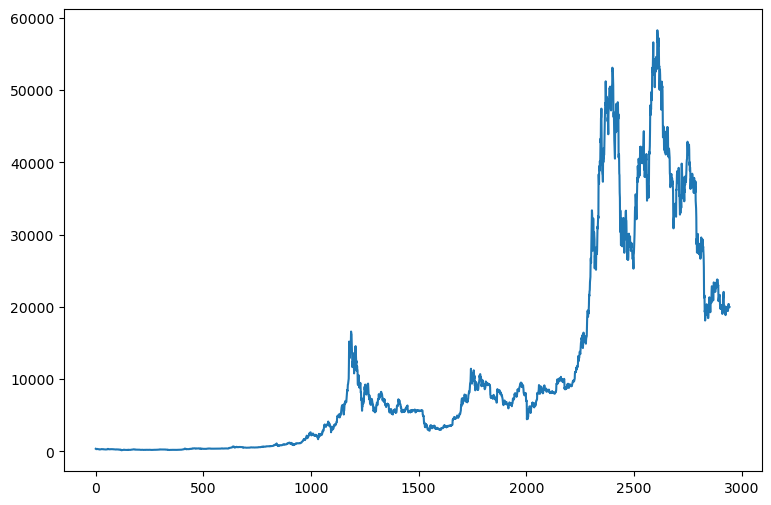

In [26]:
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

In [27]:
bitcoin.index

RangeIndex(start=0, stop=2947, step=1)

- We can change the index type from the line number to the date.
- This will unlock the Time Series modules for us if our index is set to the DataTimeIndex.
- To do this, we need to define the index when we load it in.

In [55]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date')
print(bitcoin.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  359.546204  361.468506  351.586884  355.957367  355.957367   
2014-09-18  355.588409  355.505402  319.789459  328.539368  328.539368   
2014-09-19  328.278503  330.936707  298.921021  307.761139  307.761139   
2014-09-20  307.665253  329.978180  303.931244  318.758972  318.758972   
2014-09-21  318.120514  321.504517  306.502197  310.632446  310.632446   

                Volume  
Date                    
2014-09-17  16389166.0  
2014-09-18  26691849.0  
2014-09-19  29560103.0  
2014-09-20  28736826.0  
2014-09-21  20702625.0  


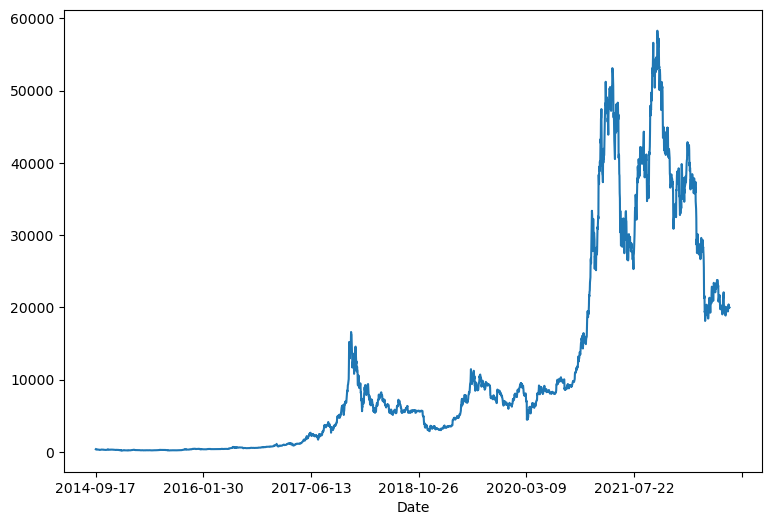

In [29]:
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

- Here we have re-loaded the data but with the index as a date.
- However, we still need to tell Pandas that it should interpret this as a date.

In [56]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
print(bitcoin.index)
print(bitcoin.head())

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05',
               '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09',
               '2022-10-10', '2022-10-11'],
              dtype='datetime64[ns]', name='Date', length=2947, freq=None)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  359.546204  361.468506  351.586884  355.957367  355.957367   
2014-09-18  355.588409  355.505402  319.789459  328.539368  328.539368   
2014-09-19  328.278503  330.936707  298.921021  307.761139  307.761139   
2014-09-20  307.665253  329.978180  303.931244  318.758972  318.758972   
2014-09-21  318.120514  321.504517  306.502197  310.632446  310.632446   

                

- Now you can see that the type is indicated as a DatetimeIndex.
- With this, we can use the TimeSeries modules.
- Pandas understands day, week, month, year, so we can easily select out certain parts of our data with this.

/tmp/ipykernel_53471/361147746.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019-09']['Close'].plot()


<AxesSubplot:xlabel='Date'>

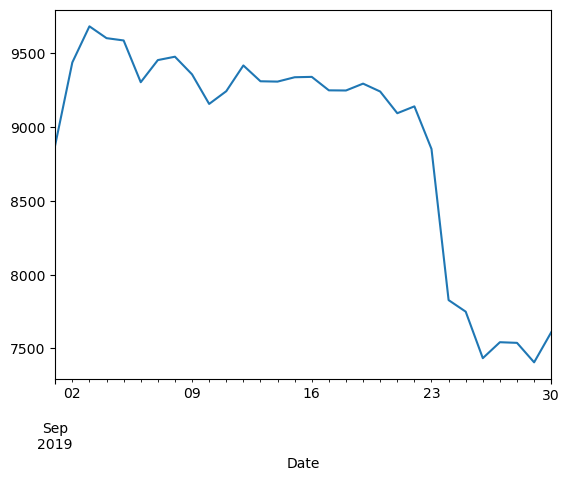

In [31]:
bitcoin['2019-09']['Close'].plot()

- Likewise, we can do slicing as well.
- We can use two [] or use the loc method.

<AxesSubplot:xlabel='Date'>

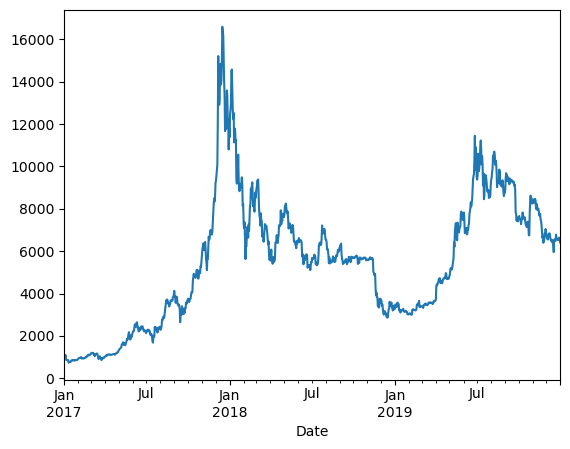

In [32]:
# bitcoin['2017':'2019']['Close'].plot()
# is the same as:
bitcoin.loc['2017':'2019', 'Close'].plot()

- Fortunately, Pandas is also good at formatting dates.
- You can use different deliniators and different formats.
- Does not just work for dates, but also dates with times going even to millisecond and nanosecond levels of precision.

- With the method resample we can regroup our data based on different frequencies or times.
- Below, we are resampling by Month and you see we get each month as a separate packet of data.
- This is useful, because now we can run statistics on our data based on different points of separation.

Date
2019-01-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-02-28    AxesSubplot(0.125,0.11;0.775x0.77)
2019-03-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-04-30    AxesSubplot(0.125,0.11;0.775x0.77)
2019-05-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-06-30    AxesSubplot(0.125,0.11;0.775x0.77)
2019-07-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-08-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-09-30    AxesSubplot(0.125,0.11;0.775x0.77)
2019-10-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-11-30    AxesSubplot(0.125,0.11;0.775x0.77)
2019-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
Freq: M, Name: Close, dtype: object

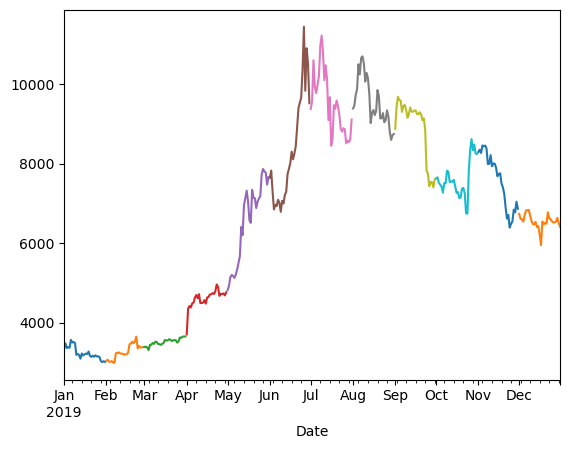

In [33]:
bitcoin.loc['2019', 'Close'].resample('M').plot()

- Below is an example of using resample with the mean to plot the monthly average and the weekly average.

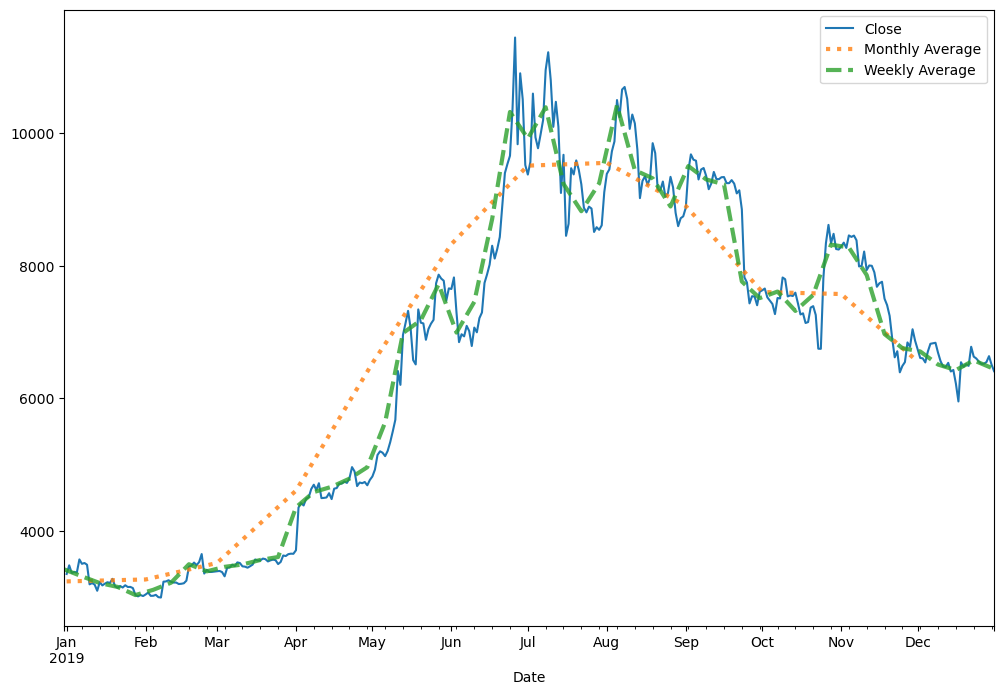

In [34]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='Monthly Average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='Weekly Average', lw=3, ls='--', alpha=0.8)
plt.legend()
plt.show()

- Commonly used with resample is another method called Agregate or agg.
- This allows us to find some basic statistics on the return of our resampled data.

In [35]:
m = bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

- Further, we can plot this data with our original and a fill_between with matplotlib to show us the min and max of the bitcoin close for our time period.

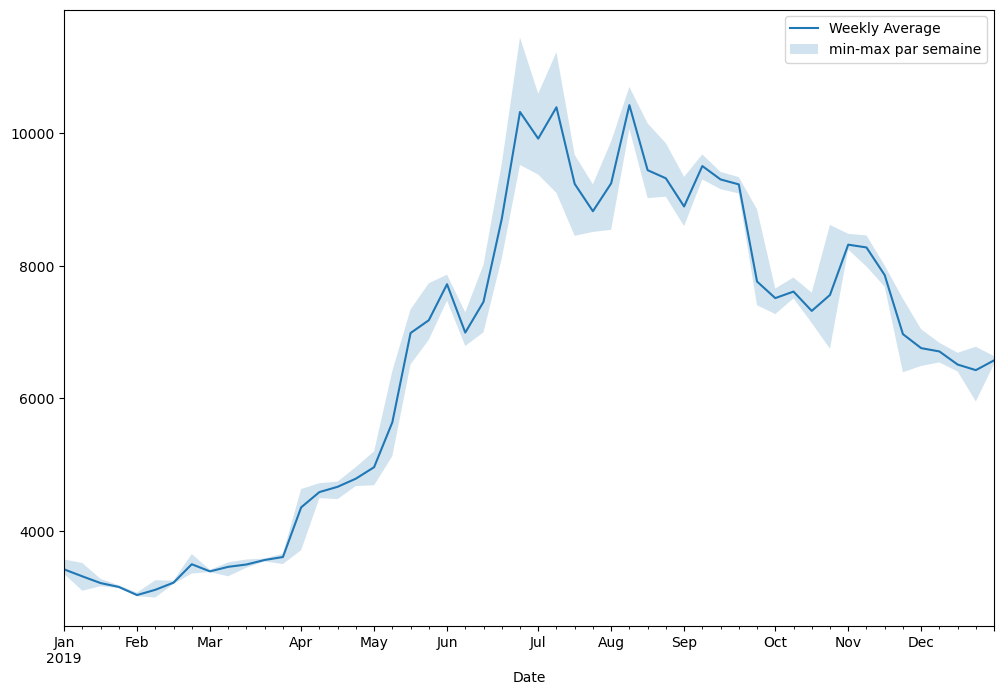

In [36]:
plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='Weekly Average')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

- We can also calculate the moving average with Pandas as well. 
- To do this, we will use the method rolling and then pass some parameters for the time period we want.
- When we call the rolling method we get a rolling class that we can then pass a number of other methods.

In [22]:
print(type(bitcoin.loc['2019', 'Close'].rolling(window=7)))
print(bitcoin.loc['2019', 'Close'].rolling(window=7))

<class 'pandas.core.window.rolling.Rolling'>
Rolling [window=7,center=False,axis=0,method=single]


- With this we can print a nice rolling average along with our spot graph.

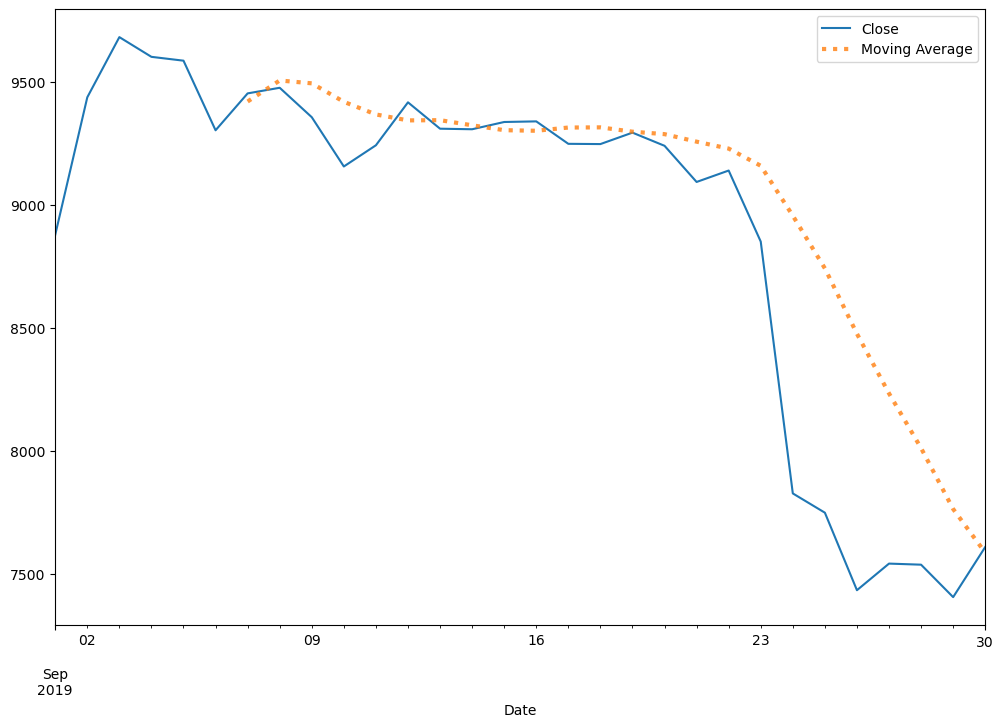

In [38]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving Average', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

- The problem with the moving average is that it is not well suited for pricing info. 
- A better calculation is the exponenecial weighten average.
- Essencially, with this equation, values lose weight over time so old values have less effect than newer values. 

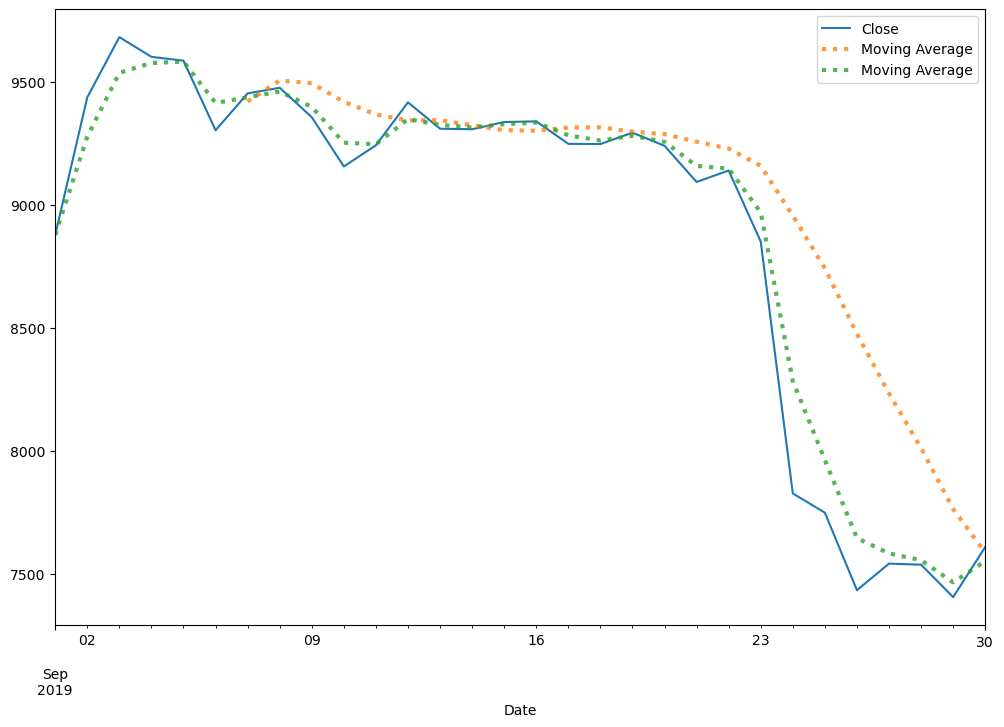

In [39]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving Average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='Moving Average', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

- Next up, we can combine this bitcoin data set with another crypto called ethereum.
- Ethereum does not have the same start date as bitcoin, so the TimeSeries data will be different.
- With a normal series, if the indexes are different there can be some trouble, but Pandas makes this very easy.
- You can merge series in 2 ways:
    - Inner and outer.

In [40]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

/tmp/ipykernel_53471/3896088478.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ethereum['2019']['Close'].plot()


<AxesSubplot:xlabel='Date'>

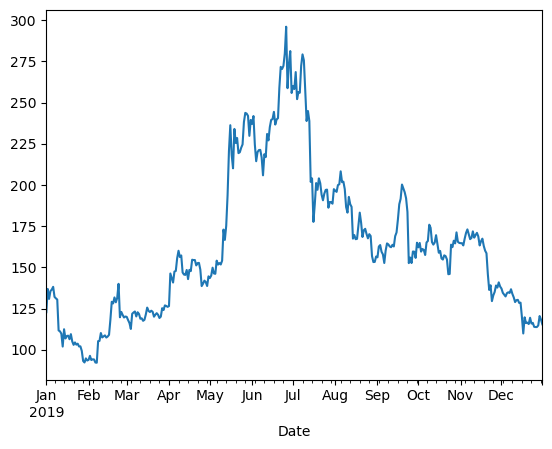

In [41]:
ethereum['2019']['Close'].plot()

- Now that we've imported our ethereum data, we can merge it with our bitcoin data.
- For our merge method, there are a couple keyword arguments to know:
    - on
        - We need to indicate on which value we are going to merge; here we say 'Date' because that's the DateTime data we want to line up for the two series.
    - how
        - There are several ways we can merge our data; this is the how argument.
        - We can do inner, outer, left, and right.
            - inner = throw out all the data that doesn't appear in both data sets.
            - outer = keep all data and sort it by index.
            - left = inner + all data from x (first listed in merge).
            - right = inner + all data from y (second listed in merge).
        - Read more here: {{https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html}}
- After a merge, you'll see the data will be suffexed by an x for the first DataFrame and a y for the second DataFrame.
    - You can re-name this with the suffixes keyword argument.

In [46]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

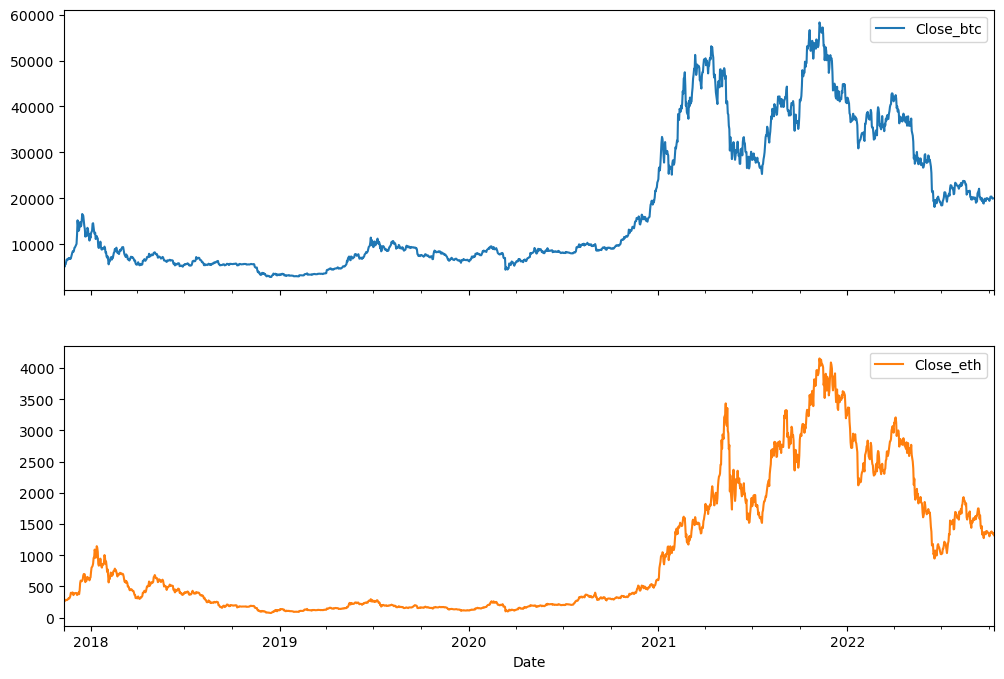

In [48]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

- Visually, we can see that btc and eth are correlated but we can calculate their correlation easily now with the corr function.

In [57]:
print(btc_eth[['Close_btc', 'Close_eth']].corr())

           Close_btc  Close_eth
Close_btc   1.000000   0.929571
Close_eth   0.929571   1.000000


- We can use the diff function to help us find the volatility as well.

<AxesSubplot:xlabel='Date'>

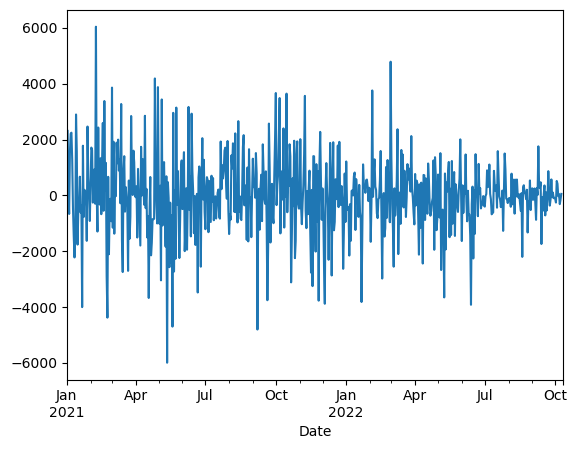

In [53]:
bitcoin['Close']['2021':'2022'].diff().plot()